*PASO 0: Cargar librerías y datos*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# Cargar dataset
df = pd.read_csv("adult_clean.csv")

df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,recode_never_worked,had_missing_cat
0,90,unknown,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K,False,True
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,False,False
2,66,unknown,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K,False,True
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,False,False
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,False,False


*PASO 1: Limpieza de nombres de columnas*


* Problemas de nombres sucios:

native.country → difícil de usar en código

education-num → error habitual en Python

Espacios → errores silenciosos

* Usaremos nombres más sencillos y lógicos siguiendo una convención clara:

minúsculas, snake_case, sin caracteres especiales

In [3]:
# Función para limpiar nombres de columnas
def clean_columns(columns):
    return (
        columns
        .str.lower()
        .str.strip()
        .str.replace(".", "_", regex=False)
        .str.replace("-", "_", regex=False)
        .str.replace(" ", "_", regex=False)
    )

df.columns = clean_columns(df.columns)

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'recode_never_worked', 'had_missing_cat'],
      dtype='object')

Tras esto, hemos estandarizado los nombres de las variables para que puedan ser más legibles y un mejor análisis.

In [6]:
df.to_csv("adult_clean_v2.csv", index=False)

*PASO 1: Identificar variable objetivo*

Todo el análisis bivariante gira alrededor de una pregunta:

¿Qué variables están asociadas con ganar más o menos de 50K?

Por eso:

income es la variable dependiente

El resto son variables explicativas

In [7]:
target = "income"
df[target].value_counts(normalize=True)

income
<=50K    0.759074
>50K     0.240926
Name: proportion, dtype: float64

Estamos evaluando:

Si hay desbalance de clase o si una clase domina claramente

Esto es importante ya que afecta a la interpretación.


Conclusión:

La variable objetivo presenta un desbalance moderado, ya que aproximadamente el 75.9% de los individuos perciben ingresos iguales o inferiores a $50,000, frente a un 24.1% que supera dicho umbral.
Este desbalance debe tenerse en cuenta en la interpretación de los resultados posteriores.

*PASO 2: Análisis bivariante (CATEGÓRICAS vs income)*

In [8]:
pd.crosstab(
    df["marital_status"],
    df["income"],
    normalize="index"
)

income,<=50K,>50K
marital_status,,
Divorced,0.895744,0.104256
Married-AF-spouse,0.565217,0.434783
Married-civ-spouse,0.553106,0.446894
Married-spouse-absent,0.918660,0.081340
Never-married,0.953970,0.046030
Separated,0.935610,0.064390
Widowed,0.914401,0.085599


*Conclusión*

El estado civil muestra una relación clara y significativa con el nivel de ingresos.
Las personas casadas presentan una probabilidad sustancialmente mayor de percibir ingresos superiores a $50,000, mientras que los individuos nunca casados o separados se concentran mayoritariamente en el grupo de menores ingresos.

*PASO 3 — Análisis bivariante: variables numéricas vs income*


Comparamos distribuciones numéricas entre ambos grupos de ingresos usando boxplots y estadísticos.


* Edad

In [9]:
df.groupby("income")["age"].median()

income
<=50K    34.0
>50K     44.0
Name: age, dtype: float64

*Conclusión*

Las personas con ingresos superiores a $50,000 presentan una mediana de edad significativamente mayor, lo que sugiere que la experiencia laboral acumulada influye positivamente en el nivel de ingresos.

* Nivel Educativo

In [10]:
df.groupby("income")["education_num"].median()

income
<=50K     9.0
>50K     12.0
Name: education_num, dtype: float64

*Conclusión*

El nivel educativo es una de las variables más influyentes del análisis.
Los individuos con mayores ingresos presentan, en promedio, más años de educación formal.

* Horas trabajadas por semana (hours_per_week)

In [11]:
df.groupby("income")["hours_per_week"].median()


income
<=50K    40.0
>50K     40.0
Name: hours_per_week, dtype: float64

In [6]:
df.groupby("income")["hours_per_week"].max()

income
<=50K    99
>50K     99
Name: hours_per_week, dtype: int64

*Conclusión*

Podemos ver que las horas de trabajos entre los mayores y menores de 50k no distan entre sí dejando claro que no es un factor determinante.

In [12]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols.remove(target)

categorical_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

*Gráficos y tablas de proporciones*

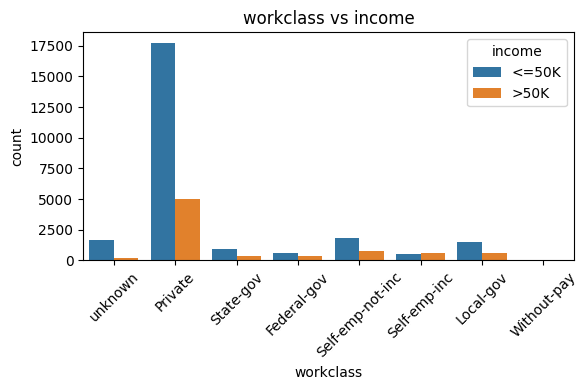

income               <=50K      >50K
workclass                           
Federal-gov       0.613542  0.386458
Local-gov         0.705208  0.294792
Private           0.781193  0.218807
Self-emp-inc      0.442652  0.557348
Self-emp-not-inc  0.714961  0.285039
State-gov         0.728043  0.271957
Without-pay       1.000000  0.000000
unknown           0.896365  0.103635
--------------------------------------------------


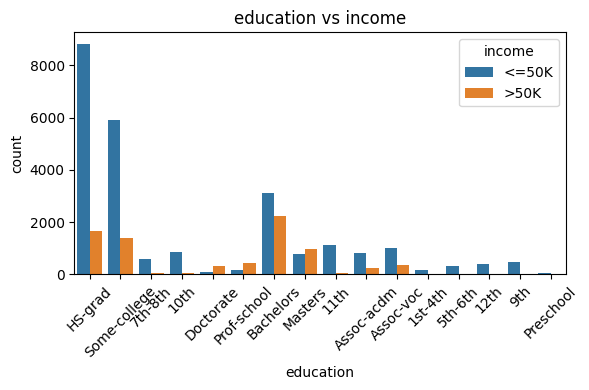

income           <=50K      >50K
education                       
10th          0.933548  0.066452
11th          0.948936  0.051064
12th          0.923788  0.076212
1st-4th       0.963855  0.036145
5th-6th       0.951807  0.048193
7th-8th       0.937984  0.062016
9th           0.947471  0.052529
Assoc-acdm    0.751640  0.248360
Assoc-voc     0.738784  0.261216
Bachelors     0.585092  0.414908
Doctorate     0.259080  0.740920
HS-grad       0.840480  0.159520
Masters       0.443089  0.556911
Preschool     1.000000  0.000000
Prof-school   0.265625  0.734375
Some-college  0.809668  0.190332
--------------------------------------------------


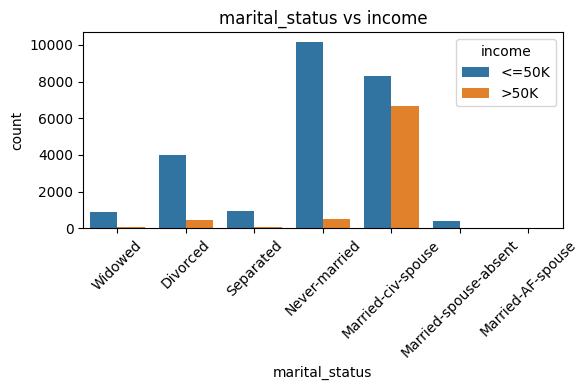

income                    <=50K      >50K
marital_status                           
Divorced               0.895744  0.104256
Married-AF-spouse      0.565217  0.434783
Married-civ-spouse     0.553106  0.446894
Married-spouse-absent  0.918660  0.081340
Never-married          0.953970  0.046030
Separated              0.935610  0.064390
Widowed                0.914401  0.085599
--------------------------------------------------


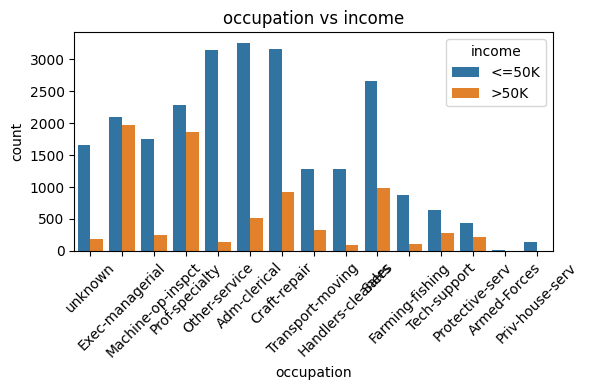

income                <=50K      >50K
occupation                           
Adm-clerical       0.865446  0.134554
Armed-Forces       0.888889  0.111111
Craft-repair       0.773083  0.226917
Exec-managerial    0.515867  0.484133
Farming-fishing    0.884073  0.115927
Handlers-cleaners  0.937180  0.062820
Machine-op-inspct  0.875500  0.124500
Other-service      0.958371  0.041629
Priv-house-serv    0.993197  0.006803
Prof-specialty     0.550774  0.449226
Protective-serv    0.674884  0.325116
Sales              0.730685  0.269315
Tech-support       0.694714  0.305286
Transport-moving   0.799624  0.200376
unknown            0.896365  0.103635
--------------------------------------------------


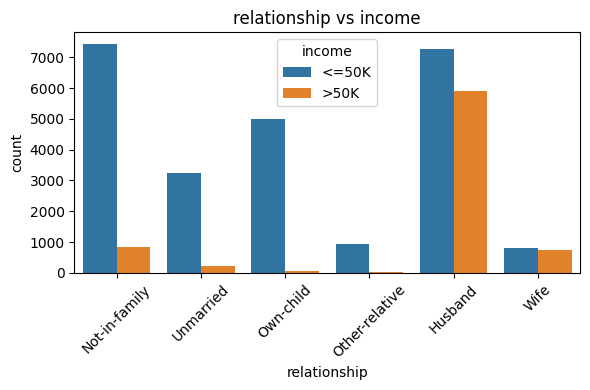

income             <=50K      >50K
relationship                      
Husband         0.551376  0.448624
Not-in-family   0.896768  0.103232
Other-relative  0.962283  0.037717
Own-child       0.986769  0.013231
Unmarried       0.936720  0.063280
Wife            0.524872  0.475128
--------------------------------------------------


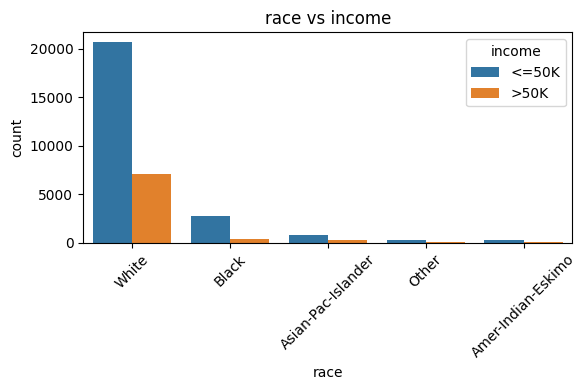

income                 <=50K      >50K
race                                  
Amer-Indian-Eskimo  0.884244  0.115756
Asian-Pac-Islander  0.734104  0.265896
Black               0.876041  0.123959
Other               0.907749  0.092251
White               0.744019  0.255981
--------------------------------------------------


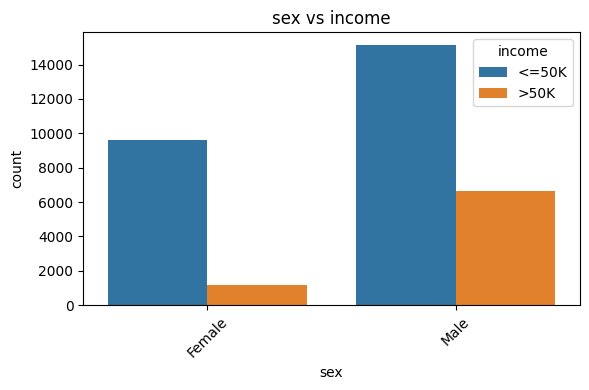

income     <=50K      >50K
sex                       
Female  0.890448  0.109552
Male    0.694145  0.305855
--------------------------------------------------


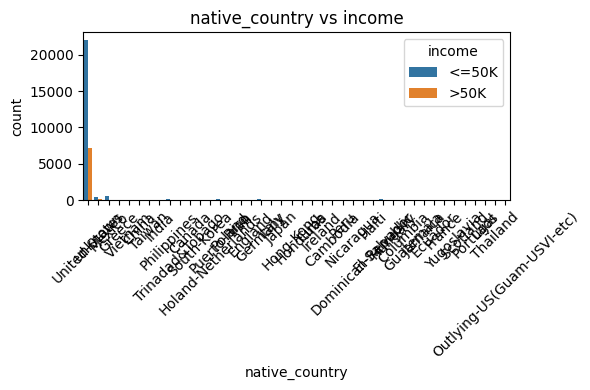

income                         <=50K      >50K
native_country                                
Cambodia                    0.631579  0.368421
Canada                      0.677686  0.322314
China                       0.733333  0.266667
Columbia                    0.966102  0.033898
Cuba                        0.736842  0.263158
Dominican-Republic          0.971429  0.028571
Ecuador                     0.857143  0.142857
El-Salvador                 0.915094  0.084906
England                     0.666667  0.333333
France                      0.586207  0.413793
Germany                     0.678832  0.321168
Greece                      0.724138  0.275862
Guatemala                   0.951613  0.048387
Haiti                       0.909091  0.090909
Holand-Netherlands          1.000000  0.000000
Honduras                    0.923077  0.076923
Hong-Kong                   0.700000  0.300000
Hungary                     0.769231  0.230769
India                       0.600000  0.400000
Iran         

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col} vs income")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(pd.crosstab(df[col], df[target], normalize="index"))
    print("-"*50)

* TABLA 1 (workclass vs income)
Análisis

En el gráfico se aprecia que la mayoría de individuos pertenecen al sector Private.

Las categorías Self-emp-not-inc y Self-emp-inc muestran una mayor proporción relativa de ingresos altos.

Las categorías relacionadas con empleo público o sin pago presentan menor proporción de >50K.

*Conclusión*

El tipo de empleo muestra diferencias en la distribución de ingresos.
Los trabajadores por cuenta propia presentan una mayor proporción de ingresos superiores a $50,000, mientras que otras categorías laborales se concentran mayoritariamente en el grupo de menores ingresos.

* TABLA 2 (education vs income)
Análisis

Las categorías de educación baja (Primary, Secondary) concentran casi exclusivamente ingresos <=50K.

A medida que aumenta el nivel educativo, crece de forma clara la proporción de individuos con ingresos >50K.

Las categorías universitarias y de posgrado destacan visualmente.

*Conclusión*

El nivel educativo muestra una relación clara y positiva con el nivel de ingresos.
Las personas con estudios superiores presentan una mayor probabilidad de percibir ingresos superiores a $50,000, confirmando la educación como uno de los factores más influyentes del análisis.

* TABLA 3 (marital_status vs income)
Análisis

Las personas casadas concentran una proporción notablemente mayor de ingresos altos.

Las categorías Never-married, Divorced y Separated se concentran principalmente en ingresos bajos.

El patrón es consistente tanto en el gráfico como en la tabla normalizada.

*Conclusión*

El estado civil es una de las variables categóricas con mayor capacidad discriminatoria.
Estar casado se asocia con una mayor probabilidad de obtener ingresos superiores a $50,000, mientras que otros estados civiles presentan ingresos predominantemente más bajos.

* TABLA 4 (occupation vs income)
Análisis

Ocupaciones de carácter técnico, directivo o profesional presentan mayores proporciones de ingresos altos.

Ocupaciones manuales o de servicios se concentran en el grupo de menores ingresos.

Existe una alta heterogeneidad entre categorías.

*Conclusión*

La ocupación desempeña un papel relevante en la determinación del nivel de ingresos.
Los trabajos cualificados y de mayor responsabilidad muestran una mayor proporción de ingresos elevados, mientras que ocupaciones menos especializadas presentan ingresos predominantemente bajos.

* TABLA 5(relationship vs income)
Análisis

La categoría Husband destaca claramente por una mayor proporción de ingresos >50K.

Otras categorías como Not-in-family, Own-child o Unmarried presentan una mayor concentración de ingresos bajos.

El patrón es muy marcado visualmente.

*Conclusión*

La relación familiar muestra una fuerte asociación con el nivel de ingresos.
En particular, la categoría “Husband” presenta una mayor probabilidad de ingresos elevados, lo que refleja la interacción entre estructura familiar, estado civil y participación laboral.

* TABLA 6 (race vs income (ya agrupada))
Análisis

La mayoría de individuos pertenecen a la categoría White.

Se observan diferencias moderadas en la proporción de ingresos altos entre los grupos.

No se aprecia una separación extrema entre categorías tras la agrupación.

*Conclusión*

Tras la agrupación de la variable raza, se observan diferencias moderadas en la distribución de ingresos, aunque su impacto es menor en comparación con variables como educación o estado civil.

* TABLA 7 (sex vs income)
Análisis

Los hombres presentan una mayor proporción de ingresos superiores a $50,000.

Las mujeres se concentran mayoritariamente en el grupo de menores ingresos.

El patrón es consistente en gráfico y tabla.

*Conclusión*

El sexo muestra una diferencia clara en la distribución del ingreso.
Los hombres presentan una mayor proporción de ingresos altos en comparación con las mujeres, lo que sugiere la existencia de desigualdades salariales dentro del conjunto de datos.

* TABLA 8 (native_country vs income (US / Other))
Análisis

La gran mayoría de individuos pertenecen a United-States.

Tras la recodificación, las diferencias entre categorías son reducidas.

No se observa una separación clara entre niveles de ingreso.

*Conclusión*

La variable país de origen, tras ser recodificada en dos categorías, no muestra una relación fuerte con el nivel de ingresos, lo que indica un impacto limitado en comparación con otras variables analizadas.

*PASO 3: Análisis bivariante (NUMÉRICAS vs income) usando boxplots*

Usaremos boxplots ya que los ingresos no siguen distribución normal y se comparan mejor con medianas

Gracias al boxplot veremos la media, dispersión y valores extremos


 Selección numéricas

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

 Boxplots por income

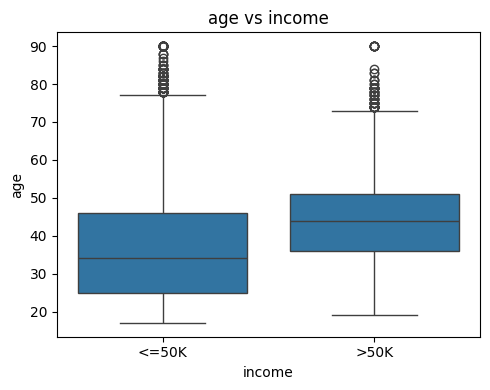

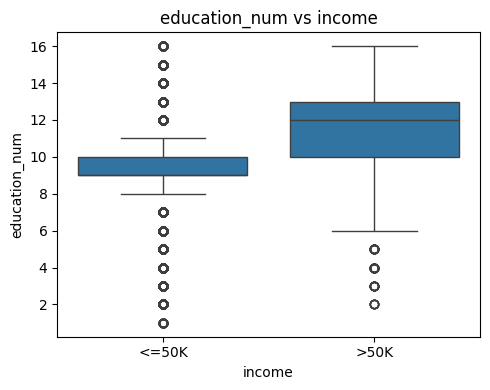

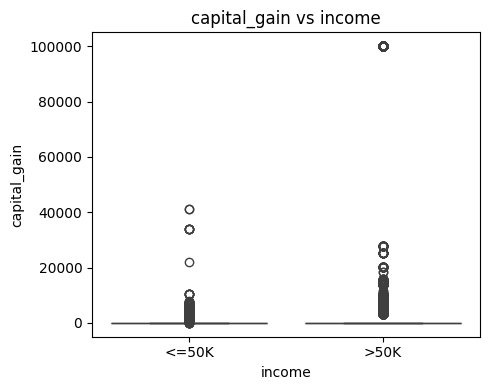

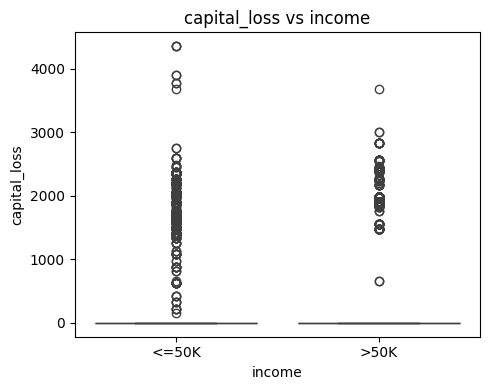

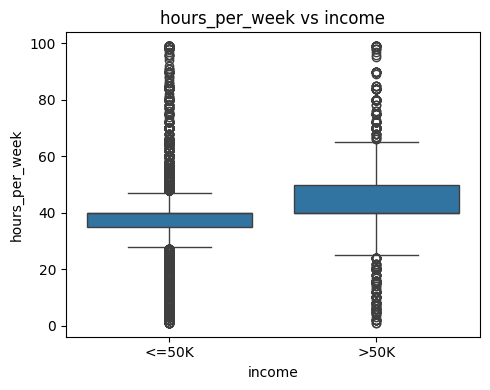

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f"{col} vs income")
    plt.tight_layout()
    plt.show()

* Imagen 1 age vs income
Análisis

Compara la distribución de la edad entre los dos niveles de ingresos.
La mediana de edad del grupo >50K es claramente más alta.
El grupo de menores ingresos presenta mayor concentración en edades jóvenes.
Existe solapamiento, pero con desplazamiento evidente hacia edades mayores en ingresos altos.

*Conclusión*

La edad presenta una asociación positiva con el nivel de ingresos.
Las personas con ingresos superiores a $50,000 tienden a ser mayores, lo que sugiere que la experiencia laboral acumulada influye en la obtención de mayores ingresos.

* Imágen 2 education_num vs income
Análisis
Compara los años de educación formal entre ambos grupos de ingresos.
El grupo >50K presenta una mediana claramente superior.
Menor dispersión relativa en el grupo de ingresos altos.
El solapamiento entre grupos es limitado.

*Conclusión*

El nivel educativo es una de las variables numéricas más influyentes del análisis.
Un mayor número de años de educación formal se asocia claramente con una mayor probabilidad de percibir ingresos superiores a $50,000.

* Imagen 3 hours_per_week vs income
Análisis

Compara las horas trabajadas semanalmente entre ambos grupos.
Ambos grupos tienen una mediana cercana a 40 horas.
El grupo >50K presenta:
mayor dispersión
más valores altos (colas superiores más largas)

*Conclusión*

Aunque la mediana de horas trabajadas es similar en ambos grupos, las personas con mayores ingresos presentan una mayor variabilidad y una mayor presencia de jornadas laborales extensas.
Esto indica que trabajar más horas puede contribuir a mayores ingresos, pero no es un factor determinante por sí solo.

* Imagen capital_gain vs income
Análisis

Distribución de ganancias de capital según nivel de ingresos.
La gran mayoría de valores son cero en ambos grupos.
El grupo >50K presenta:
mayor número de valores positivos
valores extremos muy elevados
Distribución altamente asimétrica.

*Conclusión*

La variable capital_gain presenta una distribución extremadamente asimétrica, con una alta concentración de valores cero y pocos valores muy elevados.
Las ganancias de capital positivas se observan principalmente en el grupo de mayores ingresos, lo que justifica la creación de una variable binaria para su análisis.

* Imagen 5 capital_loss vs income
Análisis

Distribución de pérdidas de capital entre los dos grupos.
La mayoría de los valores son cero.
El grupo >50K presenta mayor dispersión y algunos valores positivos.
Menor impacto visual que capital_gain.

*Conclusión*

Al igual que capital_gain, la variable capital_loss presenta una alta concentración de ceros y una distribución asimétrica.
Las pérdidas de capital aparecen con mayor frecuencia en el grupo de mayores ingresos, lo que sugiere una mayor participación en inversiones financieras.

*Medias por grupo*

Analíticamente:

Sirve para resumir

No sustituye al boxplot

Puede verse afectado por outliers

In [16]:
df.groupby(target)[numeric_cols].mean().T


income,<=50K,>50K
age,36.787392,44.250925
education_num,9.596081,11.612195
capital_gain,148.884970,4007.164562
capital_loss,53.190258,195.051282
hours_per_week,38.842862,45.473402


🔹 PASO 5: Análisis multivariante (CORRELACIONES)

*Matriz de correlación*

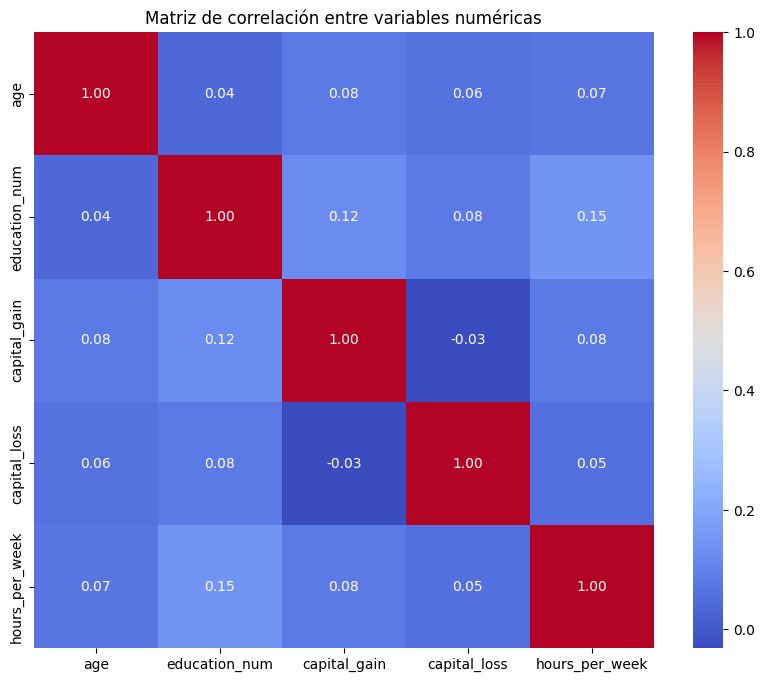

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

*Conclusión*

El análisis conjunto del nivel educativo y las horas trabajadas por semana muestra que el nivel educativo actúa como un factor diferenciador más relevante del ingreso que las horas trabajadas.

Los individuos con ingresos superiores a $50,000 se concentran principalmente en niveles educativos más altos, mientras que las horas trabajadas presentan una mayor superposición entre ambos grupos.

Esto sugiere que el nivel de ingresos está influido por una combinación de factores, siendo la educación un elemento clave, mientras que el número de horas trabajadas por sí solo no garantiza mayores ingresos.

In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].corr()

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,0.036224,0.077676,0.057745,0.068515
education_num,0.036224,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,0.079892,-0.031639,1.000000,0.054229
hours_per_week,0.068515,0.148422,0.078408,0.054229,1.000000


*Conclusión*

No se observan correlaciones fuertes entre las variables numéricas, lo que indica una baja multicolinealidad.

*PASO 6: Multivariante simple*

Ejemplo: education_num + hours_per_week vs income
Ejemplo: Educación + horas trabajadas + income

Lo usaremos para:
Ver separaciones visuales entre grupos
Explicar visualmente resultados

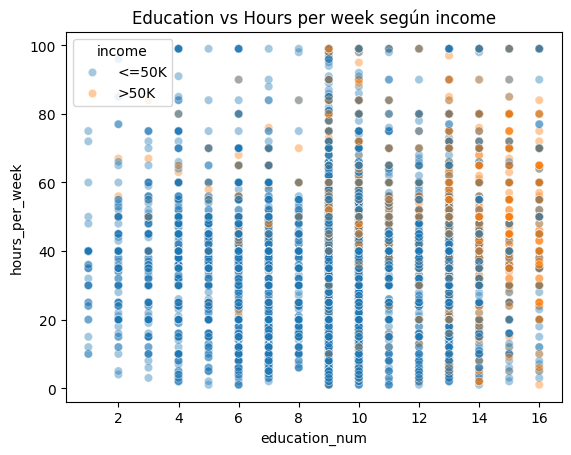

In [19]:
sns.scatterplot(
    data=df,
    x="education_num",
    y="hours_per_week",
    hue=target,
    alpha=0.4
)
plt.title("Education vs Hours per week según income")
plt.show()

*Conclusión*

El análisis conjunto del nivel educativo y las horas trabajadas por semana muestra que el nivel educativo actúa como un factor diferenciador más relevante del ingreso que las horas trabajadas.

Los individuos con ingresos superiores a $50,000 se concentran principalmente en niveles educativos más altos, mientras que las horas trabajadas presentan una mayor superposición entre ambos grupos.

Esto sugiere que el nivel de ingresos está influido por una combinación de factores, siendo la educación un elemento clave, mientras que el número de horas trabajadas por sí solo no garantiza mayores ingresos.

*Test Chi-Cuadrado: Educación vs Ingresos*

In [20]:
from scipy.stats import chi2_contingency
import pandas as pd

# Tabla de contingencia
contingency_table = pd.crosstab(df['education'], df['income'])

# Test Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value

(np.float64(4428.404687554787), np.float64(0.0))

*Conclusión*

Se rechaza con claridad la hipótesis nula
Existe una relación estadísticamente significativa entre el nivel educativo y el ingreso

*Test de Mann-Withney: Edad vs Ingresos*

In [21]:
from scipy.stats import mannwhitneyu

# Separar grupos
low_income = df[df['income'] == '<=50K']['age']
high_income = df[df['income'] == '>50K']['age']

# Test Mann-Whitney
stat, p_value = mannwhitneyu(low_income, high_income, alternative='two-sided')

stat, p_value

(np.float64(61147488.0), np.float64(0.0))

*Conclusión*

p-value < 0.05 →
Diferencia estadísticamente significativa en la edad
El grupo de mayores ingresos tiende a ser más adulto

*Income vs Education_num*

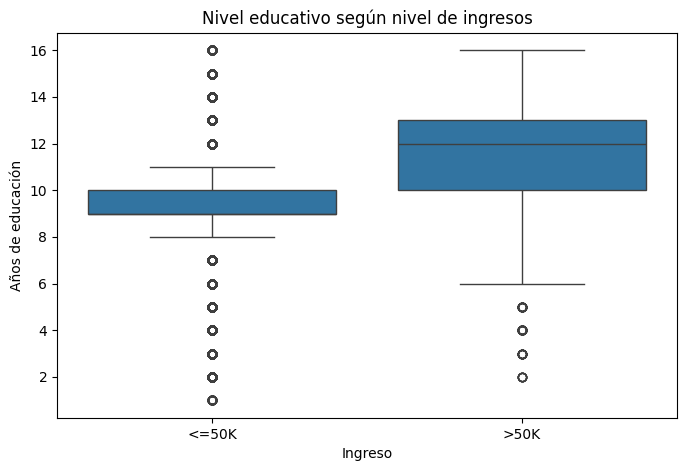

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='education_num')
plt.title('Nivel educativo según nivel de ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Años de educación')
plt.show()

Mediana claramente mayor en >50K
Menor dispersión en ingresos bajos

Los individuos con ingresos bajos presentan niveles educativos más homogéneos, concentrados en rangos medios o bajos, mientras que los individuos con ingresos altos muestran una mayor variabilidad educativa. Esto sugiere que, aunque un alto nivel educativo no garantiza ingresos elevados, sí amplía las posibilidades de acceder a ellos.

Sin educación alta → casi imposible llegar a >50K

Con educación alta → posible, pero no garantizado